/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 38, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 19, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 17, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 8, 128)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 31, 8, 128)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 6, 128)        1

2023-09-14 06:40:17.292982: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


387/387 [==============================] - ETA: 0s - loss: 0.2970 - accuracy: 0.4340
Epoch 1: val_accuracy improved from -inf to 0.52817, saving model to best_model.hdf5
387/387 [==============================] - 13s 10ms/step - loss: 0.2970 - accuracy: 0.4340 - val_loss: 0.2639 - val_accuracy: 0.5282
Epoch 2/400
386/387 [============================>.] - ETA: 0s - loss: 0.2313 - accuracy: 0.5863
Epoch 2: val_accuracy improved from 0.52817 to 0.59643, saving model to best_model.hdf5
387/387 [==============================] - 4s 9ms/step - loss: 0.2312 - accuracy: 0.5867 - val_loss: 0.2376 - val_accuracy: 0.5964
Epoch 3/400
382/387 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.6160
Epoch 3: val_accuracy improved from 0.59643 to 0.60696, saving model to best_model.hdf5
387/387 [==============================] - 3s 9ms/step - loss: 0.2153 - accuracy: 0.6162 - val_loss: 0.2238 - val_accuracy: 0.6070
Epoch 4/400
386/387 [============================>.] - ETA: 0s - 

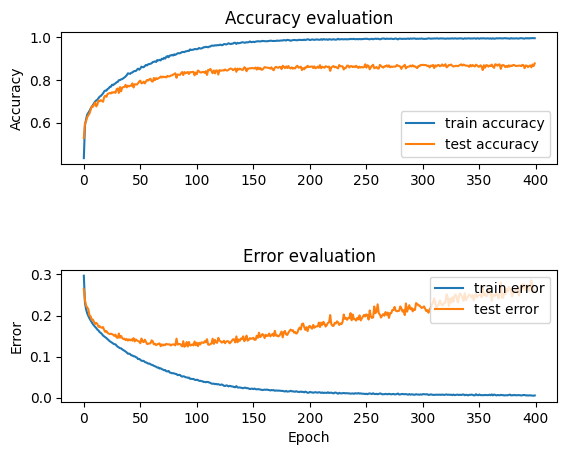

51/51 - 0s - loss: 0.1654 - accuracy: 0.8677 - 214ms/epoch - 4ms/step

Test accuracy: 0.8676561713218689
1/1 [==============================] - 0s 154ms/step
Target: [0. 1. 0. 0. 0. 0. 0. 0.], Predicted label: [0]
51/51 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       244
           1       0.90      0.85      0.88       247
           2       0.95      0.92      0.94       185
           3       0.76      0.79      0.78       192
           4       0.96      0.91      0.93       202
           5       0.91      0.92      0.92       189
           6       0.70      0.81      0.75       178
           7       0.86      0.80      0.83       180

    accuracy                           0.87      1617
   macro avg       0.87      0.87      0.87      1617
weighted avg       0.87      0.87      0.87      1617



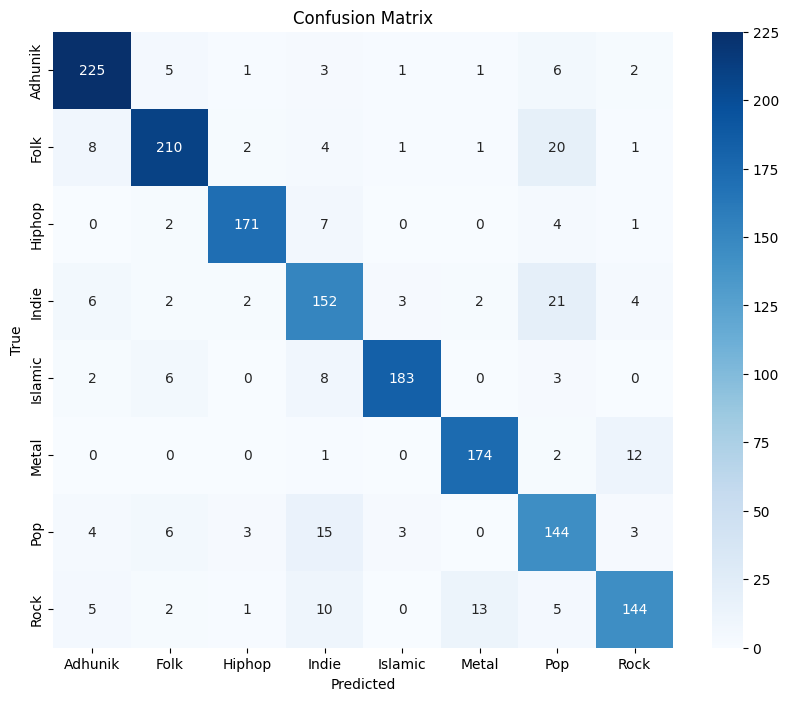

<Figure size 640x480 with 0 Axes>

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense,Activation,Dropout
DATA_PATH = "/kaggle/input/mfcc-40/mfcc_40.json"


def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[1].set_xlabel("Epoch")
    axs[0].set_title("Accuracy evaluation")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error evaluation")
    
    plt.subplots_adjust(hspace=0.8)
    

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)
    
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    
    

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    
#     # Convert integer labels to one-hot encoding
    y_train = to_categorical(y_train, num_classes=8)
    y_validation = to_categorical(y_validation, num_classes=8)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates CNN model

    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D(2, padding='valid'))
    #model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, padding='valid'))
    model.add(Dropout(0.3))
    #model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, padding='valid'))
    model.add(Dropout(0.3))
    #model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    #model.add(keras.layers.Flatten())

    # output layer
    model.add(keras.layers.GlobalAveragePooling2D())
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(8, activation='softmax'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    
    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.1, 0.15)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    
   
    earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.0001)
    modelcheck = ModelCheckpoint('best_model.hdf5',monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
    
    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=400, callbacks=[modelcheck])

    # plot accuracy/error for training and validation
    plot_history(history)
    
    y_test = to_categorical(y_test, num_classes=8)
    
    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)
    
    genre_names = [
    "Adhunik", "Folk", "Hiphop", "Indie", 
    "Islamic", "Metal", "Pop", "Rock"
    ]
    
    # Generate predictions for the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test = np.argmax(y_test, axis=1)

    
    # Generate classification report
    print(classification_report(y_test, y_pred_classes))

   # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=genre_names, yticklabels=genre_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()  # Show the plot

    # Save the plot after showing it
    plt.savefig("sample_plot.png")
